## Basic Time Series Analysis

### Import Basic Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [3]:
# Read CSV Files
df = pd.read_csv('TCS.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [4]:
df.shape

(4139, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4139 non-null   object 
 1   Symbol              4139 non-null   object 
 2   Series              4139 non-null   object 
 3   Prev Close          4139 non-null   float64
 4   Open                4139 non-null   float64
 5   High                4139 non-null   float64
 6   Low                 4139 non-null   float64
 7   Last                4139 non-null   float64
 8   Close               4139 non-null   float64
 9   VWAP                4139 non-null   float64
 10  Volume              4139 non-null   int64  
 11  Turnover            4139 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4139 non-null   int64  
 14  %Deliverble         4139 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 485.2

In [8]:
print(df.Date.min())

2004-08-25


In [9]:
print(df.Date.max())

2021-04-30


This Data Sheet is of 17 Commulative Data of 17 Years

### VWAP

The historic VWAP (Volume Weighted Average Price ) is the target variable to predict. VWAP is a trading benchmark used by traders that gives the average price the stock has traded at throughout the day, baesd on both volume and price.

<AxesSubplot:>

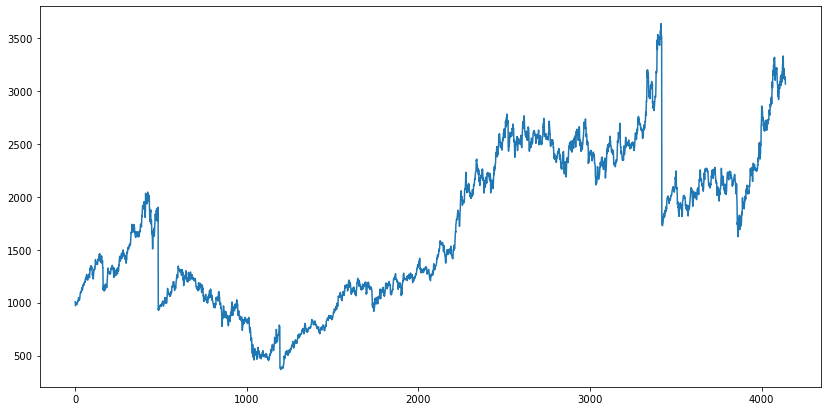

In [10]:
## Plot VWAP
df.VWAP.plot(figsize=(14,7))

### Create a New DataFrame with Selected Columns

In [11]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [12]:
data = df[['Date', 'Open', 'Close', 'High', 'Low', 'VWAP', 'Volume']]
data.head()

,Date,Open,Close,High,Low,VWAP,Volume
0,2004-08-25,1198.7,987.95,1198.7,979.00,1008.32,17116372
1,2004-08-26,992.0,979.00,997.0,975.30,985.65,5055400
2,2004-08-27,982.4,962.65,982.4,958.55,969.94,3830750
3,2004-08-30,969.9,986.75,990.0,965.00,982.65,3058151
4,2004-08-31,986.5,988.10,990.0,976.00,982.18,2649332


### Convert Date to Index

In [13]:
data['Date'] = data['Date'].apply(pd.to_datetime)

C:\Users\Jarvis\AppData\Local\Temp\ipykernel_11368\3867867236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].apply(pd.to_datetime)


In [14]:
data.set_index('Date', inplace=True)
data.head()

,Open,Close,High,Low,VWAP,Volume
Date,,,,,,
2004-08-25,1198.7,987.95,1198.7,979.00,1008.32,17116372
2004-08-26,992.0,979.00,997.0,975.30,985.65,5055400
2004-08-27,982.4,962.65,982.4,958.55,969.94,3830750
2004-08-30,969.9,986.75,990.0,965.00,982.65,3058151
2004-08-31,986.5,988.10,990.0,976.00,982.18,2649332


<AxesSubplot:xlabel='VWAP', ylabel='Density'>

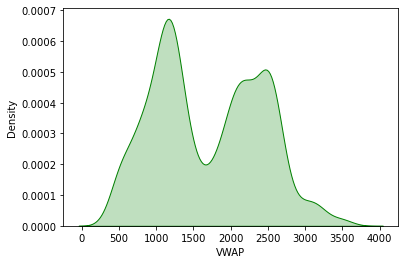

In [16]:
sns.kdeplot(data['VWAP'], shade=True, color='g')

### SubSetting

SubSetting Data using Pandas DataFrames. Instead of working with the entire data, It is also possible to slice the Time Series data to highlight the portion of the data we are interested in.

Since the Volume Weighted average price (VWAP) is a trading benchmark, we shall limit our analysis to only that column.

In [17]:
df_vwap = df[['Date', 'VWAP']]
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

C:\Users\Jarvis\AppData\Local\Temp\ipykernel_11368\1864387007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)


,VWAP
Date,
2004-08-25,1008.32
2004-08-26,985.65
2004-08-27,969.94
2004-08-30,982.65
2004-08-31,982.18


<AxesSubplot:xlabel='Date'>

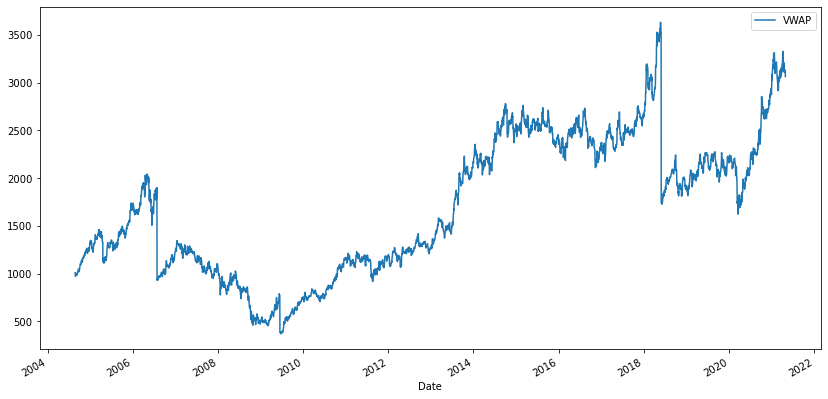

In [18]:
df_vwap.plot(figsize=(14,7))

### Plotting each month for the year 2018

Text(0, 0.5, 'VWAP')

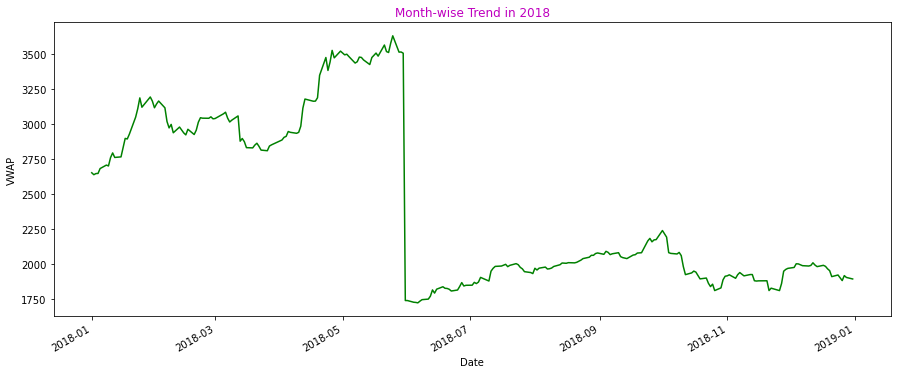

In [19]:
## Plotting Month - wise Trends of the Stock
\ax = df_vwap.loc['2018', 'VWAP'].plot(figsize=(15,6), color='g')
ax.set_title('Month-wise Trend in 2018', color='m');
ax.set_ylabel('VWAP')

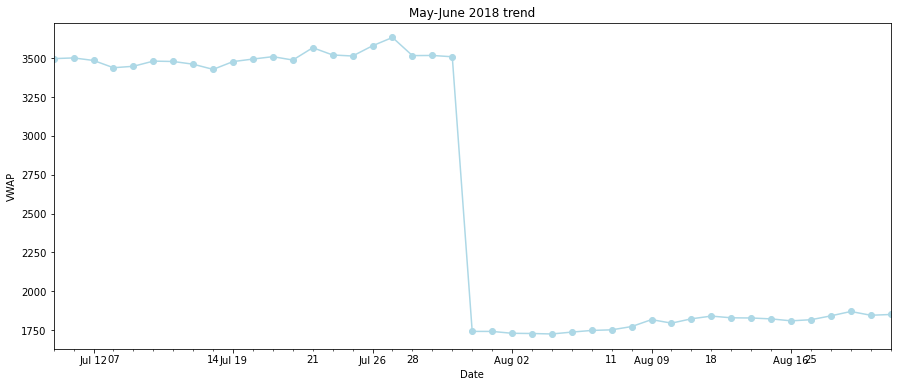

In [23]:
## Plotting Quaterly Trends of the Stock
ax = df_vwap.loc['2018-05' : '2018-06', 'VWAP'].plot(marker='o', linestyle='-', figsize=(15,6), color='lightblue')
ax.set_title('May-June 2018 trend')
ax.set_ylabel('VWAP')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))   #Set the locator of the major ticker.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))     #Set the formatter of the major ticker

### Month-wise Trend Analysis Of Year 2020

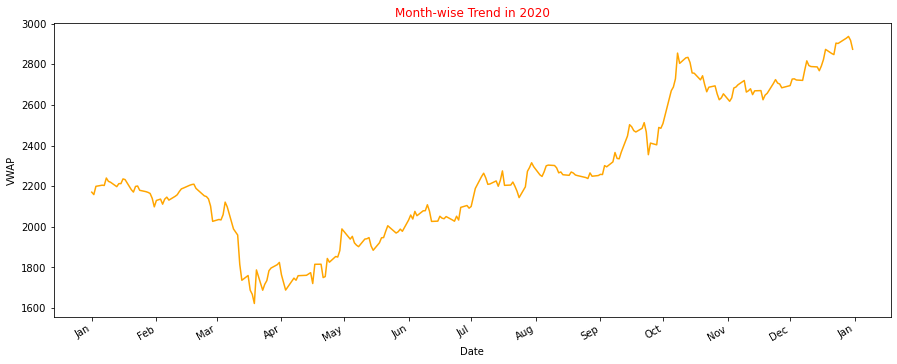

In [24]:
ax = df_vwap.loc['2020', 'VWAP'].plot(figsize=(15,6), color='orange')
ax.set_title('Month-wise Trend in 2020', color='r')
ax.set_ylabel('VWAP')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

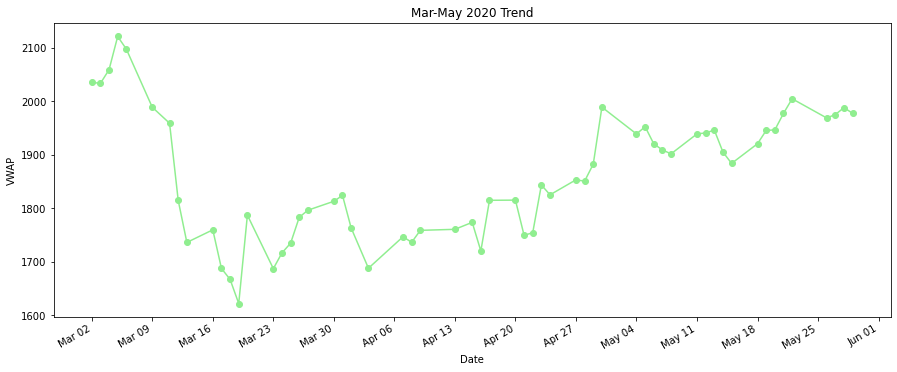

In [25]:
ax = df_vwap.loc['2020-03':'2020-05', 'VWAP'].plot(marker='o', linestyle='-', figsize=(15,6), color='lightgreen')
ax.set_title("Mar-May 2020 Trend")
ax.set_ylabel('VWAP')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

### Reset 

In [26]:
df_vwap.reset_index(inplace=True)
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek
df_vwap['weekday Name'] = df_vwap.Date.dt.day_name()

C:\Users\Jarvis\AppData\Local\Temp\ipykernel_11368\1035542218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vwap['year'] = df_vwap.Date.dt.year
C:\Users\Jarvis\AppData\Local\Temp\ipykernel_11368\1035542218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vwap['month'] = df_vwap.Date.dt.month
C:\Users\Jarvis\AppData\Local\Temp\ipykernel_11368\1035542218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [27]:
# Set DAte Column as the index column
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

,VWAP,year,month,day,day of week,weekday Name
Date,,,,,,
2004-08-25,1008.32,2004,8,25,2,Wednesday
2004-08-26,985.65,2004,8,26,3,Thursday
2004-08-27,969.94,2004,8,27,4,Friday
2004-08-30,982.65,2004,8,30,0,Monday
2004-08-31,982.18,2004,8,31,1,Tuesday


### Time Resampling

We use a process called time resampling to aggregate data into a defined time period, such as by month or by quarter. Institutions can then see an overview of stock prices and make decisions according to these trends.

- The Pandas library has a resample() function which resamples such time series data.
- The resample() function which resamples such as time series data.
- The resample() in pandas is similar to its groupby method as it is essentially grouping according to certain time span.

#### Year end Resampling (A)

In [28]:
df_vwap.resample(rule='A').mean()[:5]


,VWAP,year,month,day,day of week
Date,,,,,
2004-12-31,1138.188556,2004.0,10.377778,16.144444,2.044444
2005-12-31,1372.491195,2005.0,6.541833,15.733068,2.000000
2006-12-31,1475.749840,2006.0,6.552000,15.976000,2.056000
2007-12-31,1151.282209,2007.0,6.554217,15.843373,1.987952
2008-12-31,789.674024,2008.0,6.443089,15.821138,1.955285


Text(0.5, 1.0, 'Yearly Mean VWAP for TCS')

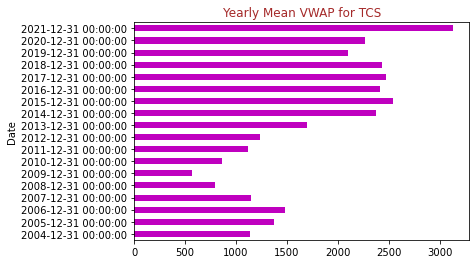

In [30]:
df_vwap['VWAP'].resample('A').mean().plot(kind='barh', color='m')
plt.title('Yearly Mean VWAP for TCS', color='brown')

#### Weekly Frequency (W)

In [31]:
df_vwap.resample(rule = 'W').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2004-08-29,987.970,2004.0,8.0,26.0,3.0
2004-09-05,989.676,2004.0,8.6,13.4,2.0
2004-09-12,992.356,2004.0,9.0,8.0,2.0
2004-09-19,1012.058,2004.0,9.0,15.0,2.0
2004-09-26,1037.536,2004.0,9.0,22.0,2.0


#### Monthly Frequency (M)

In [32]:
df_vwap.resample(rule = 'M').std()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2004-08-31,13.979681,0.0,0.0,2.588436,1.581139
2004-09-30,18.731890,0.0,0.0,9.135938,1.396502
2004-10-31,30.387472,0.0,0.0,8.848877,1.598519
2004-11-30,28.224349,0.0,0.0,9.184655,1.386969
2004-12-31,32.356330,0.0,0.0,9.480164,1.423962


#### Standard Deviation

In [33]:
df_vwap.resample(rule = 'M').std()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2004-08-31,13.979681,0.0,0.0,2.588436,1.581139
2004-09-30,18.731890,0.0,0.0,9.135938,1.396502
2004-10-31,30.387472,0.0,0.0,8.848877,1.598519
2004-11-30,28.224349,0.0,0.0,9.184655,1.386969
2004-12-31,32.356330,0.0,0.0,9.480164,1.423962


#### Quater Freqency (Q)

In [34]:
df_vwap.resample(rule ='Q').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2004-09-30,1008.245556,2004.0,8.814815,17.925926,2.037037
2004-12-31,1193.878413,2004.0,11.047619,15.380952,2.047619
2005-03-31,1356.078033,2005.0,2.049180,15.000000,1.901639
2005-06-30,1255.994308,2005.0,5.046154,15.646154,2.030769
2005-09-30,1350.006190,2005.0,8.015873,15.777778,2.047619


#### Pandas Shift()

Pandas Shift(), shifts index by the desired number of periods. This functions takes a scaler parameter called a period, which represents the number of shifts for the desired axis. This function is beneficial when dealing with time-series data. 

#### Forward Shifting

To shift our data forward, we will pass the desired number of periods ( or increments ) through the shift() function, which needs to positive value in this case.
- Ex :- Lets move our data forward by one period or index, which means that all values which earlier corresponded to row N will now belong to row N+1.

### Origial Dataframe

In [35]:
df_vwap.head()

,VWAP,year,month,day,day of week,weekday Name
Date,,,,,,
2004-08-25,1008.32,2004,8,25,2,Wednesday
2004-08-26,985.65,2004,8,26,3,Thursday
2004-08-27,969.94,2004,8,27,4,Friday
2004-08-30,982.65,2004,8,30,0,Monday
2004-08-31,982.18,2004,8,31,1,Tuesday


### Forward Shift 

In [36]:
df_vwap.shift(1).head()

,VWAP,year,month,day,day of week,weekday Name
Date,,,,,,
2004-08-25,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-26,1008.32,2004.0,8.0,25.0,2.0,Wednesday
2004-08-27,985.65,2004.0,8.0,26.0,3.0,Thursday
2004-08-30,969.94,2004.0,8.0,27.0,4.0,Friday
2004-08-31,982.65,2004.0,8.0,30.0,0.0,Monday


### Backward Shift

In [37]:
df_vwap.shift(-1).head()

,VWAP,year,month,day,day of week,weekday Name
Date,,,,,,
2004-08-25,985.65,2004.0,8.0,26.0,3.0,Thursday
2004-08-26,969.94,2004.0,8.0,27.0,4.0,Friday
2004-08-27,982.65,2004.0,8.0,30.0,0.0,Monday
2004-08-30,982.18,2004.0,8.0,31.0,1.0,Tuesday
2004-08-31,989.68,2004.0,9.0,1.0,2.0,Wednesday


### Rolling Window

A Rolling mean, or moving average, is a transformation method which helps average out noise from data. It works by simply splitting and aggregating the data into windows according to function, such as mean(), median(), count(),etc. For this example, we'll use a rolling mean for 7 days.

In [38]:
df_vwap.rolling(7).mean().head(10)

C:\Users\Jarvis\AppData\Local\Temp\ipykernel_11368\120340669.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['weekday Name'], dtype='object')
  df_vwap.rolling(7).mean().head(10)


,VWAP,year,month,day,day of week
Date,,,,,
2004-08-25,NaN,NaN,NaN,NaN,NaN
2004-08-26,NaN,NaN,NaN,NaN,NaN
2004-08-27,NaN,NaN,NaN,NaN,NaN
2004-08-30,NaN,NaN,NaN,NaN,NaN
2004-08-31,NaN,NaN,NaN,NaN,NaN
2004-09-01,NaN,NaN,NaN,NaN,NaN
2004-09-02,987.911429,2004.0,8.285714,20.285714,2.142857
2004-09-03,986.281429,2004.0,8.428571,17.142857,2.428571
2004-09-06,988.170000,2004.0,8.571429,14.285714,2.000000


The first six values have all become blank as there wasn't enough data to actually fill them when using a window of seven days.

So, what are the key benefits of calculating a moving average or using this rolling stock method ? 
- 